In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from warnings import filterwarnings

sns.set_style('whitegrid')

font = {'weight' : 'bold',
        'size'   : 14}

filterwarnings("ignore")

%matplotlib inline

In [47]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
# Load train set
with open('train.pkl', 'rb') as infile:
    X_train_dic = pkl.load(infile)
with open('train_Y.pkl', 'rb') as infile_Y:
    Y_train_dic = pkl.load(infile_Y)

# Load test set
with open('test.pkl', 'rb') as infile_test:
    X_test_dic = pkl.load(infile_test)
with open('test_Y.pkl', 'rb') as infile_test_Y:
    Y_test_dic = pkl.load(infile_test_Y)

>### DoS model training - Random Forest

In [6]:
dos_X = X_train_dic['dos']
dos_Y = Y_train_dic['dos']
test_dos_X = X_test_dic['dos']
test_dos_Y = Y_test_dic['dos']

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9711
           1       0.99      0.83      0.90      7460

   micro avg       0.92      0.92      0.92     17171
   macro avg       0.94      0.91      0.92     17171
weighted avg       0.93      0.92      0.92     17171

Confusion matrix, without normalization
[[9624   87]
 [1256 6204]]


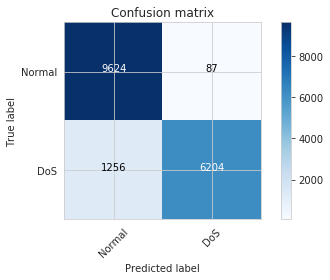

In [38]:
forest_Dos = RandomForestClassifier(random_state=1, max_depth=15, 
                                   n_estimators=500, min_samples_split=2, 
                                   min_samples_leaf=1)
                                   
modelDos_1 = forest_Dos.fit(dos_X, dos_Y)
y_pred_dos = modelDos_1.predict(test_dos_X)
print(classification_report(test_dos_Y, y_pred_dos))
plot_confusion_matrix(confusion_matrix(test_dos_Y, y_pred_dos),['Normal', 'DoS'])

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9711
           1       0.97      0.85      0.90      7460

   micro avg       0.92      0.92      0.92     17171
   macro avg       0.93      0.91      0.92     17171
weighted avg       0.93      0.92      0.92     17171

Confusion matrix, without normalization
[[9492  219]
 [1115 6345]]


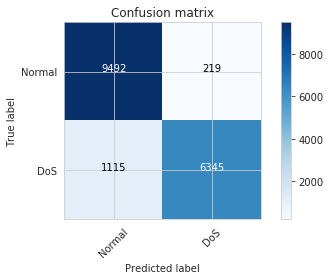

In [49]:
xgb_Dos = xgb.XGBClassifier(learning_rate=0.02, n_estimators=500, objective='binary:logistic',
                                silent=True, nthread=8, random_state=1)
modelDos_2 = xgb_Dos.fit(dos_X, dos_Y)
y_pred_dos = modelDos_2.predict(test_dos_X)
print(classification_report(test_dos_Y, y_pred_dos))
plot_confusion_matrix(confusion_matrix(test_dos_Y, y_pred_dos),['Normal', 'DoS'])

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      9711
           1       0.97      0.81      0.88      7460

   micro avg       0.91      0.91      0.91     17171
   macro avg       0.92      0.89      0.90     17171
weighted avg       0.91      0.91      0.90     17171

Confusion matrix, without normalization
[[9519  192]
 [1422 6038]]


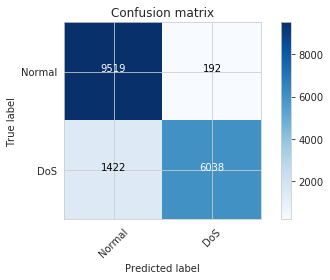

In [50]:
dtree_Dos = DecisionTreeClassifier(criterion = 'entropy', random_state=1)

modelDos_3 = dtree_Dos.fit(dos_X, dos_Y)
y_pred_dos = modelDos_3.predict(test_dos_X)
print(classification_report(test_dos_Y, y_pred_dos))
plot_confusion_matrix(confusion_matrix(test_dos_Y, y_pred_dos),['Normal', 'DoS'])

>### Probe model training - Random Forest

In [23]:
probe_X = X_train_dic['probe']
probe_Y = Y_train_dic['probe']
test_probe_X = X_test_dic['probe']
test_probe_Y = Y_test_dic['probe']

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9711
           2       0.86      0.59      0.70      2421

   micro avg       0.90      0.90      0.90     12132
   macro avg       0.88      0.78      0.82     12132
weighted avg       0.90      0.90      0.89     12132

Confusion matrix, without normalization
[[9476  235]
 [ 983 1438]]


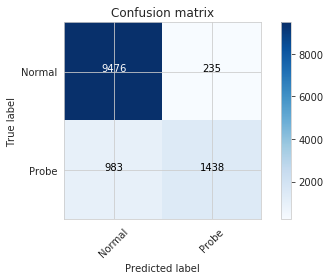

In [41]:
forest_Probe = RandomForestClassifier(random_state=1, max_depth=15, 
                                   n_estimators=500, min_samples_split=2, 
                                   min_samples_leaf=1)
                                   
modelProbe = forest_Probe.fit(probe_X, probe_Y)
y_pred_probe = modelProbe.predict(test_probe_X)
print(classification_report(test_probe_Y, y_pred_probe))
plot_confusion_matrix(confusion_matrix(test_probe_Y, y_pred_probe),['Normal', 'Probe'])

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9711
           2       0.86      0.61      0.71      2421

   micro avg       0.90      0.90      0.90     12132
   macro avg       0.88      0.79      0.83     12132
weighted avg       0.90      0.90      0.90     12132

Confusion matrix, without normalization
[[9470  241]
 [ 944 1477]]


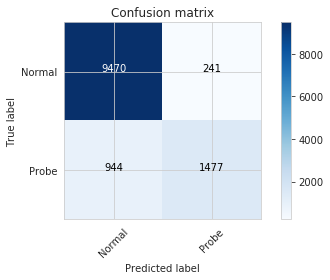

In [40]:
xgb_Probe = xgb.XGBClassifier(learning_rate=0.02, n_estimators=500, objective='binary:logistic',
                                silent=True, nthread=8, random_state=1)
                                   
modelProbe_2 = xgb_Probe.fit(probe_X, probe_Y)
y_pred_probe = modelProbe_2.predict(test_probe_X)
print(classification_report(test_probe_Y, y_pred_probe))
plot_confusion_matrix(confusion_matrix(test_probe_Y, y_pred_probe),['Normal', 'Probe'])

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9711
           2       0.85      0.66      0.74      2421

   micro avg       0.91      0.91      0.91     12132
   macro avg       0.88      0.82      0.84     12132
weighted avg       0.91      0.91      0.90     12132

Confusion matrix, without normalization
[[9426  285]
 [ 822 1599]]


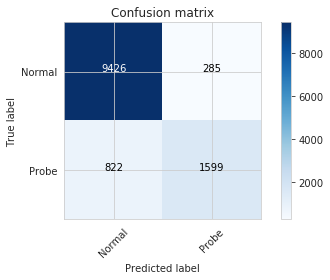

In [51]:
dtree_Probe = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
                                   
modelProbe_3 = dtree_Probe.fit(probe_X, probe_Y)
y_pred_probe = modelProbe_3.predict(test_probe_X)
print(classification_report(test_probe_Y, y_pred_probe))
plot_confusion_matrix(confusion_matrix(test_probe_Y, y_pred_probe),['Normal', 'Probe'])

>### R2L model training - Random Forest

In [26]:
R2L_X = X_train_dic['R2L']
R2L_Y = Y_train_dic['R2L']
test_R2L_X = X_test_dic['R2L']
test_R2L_Y = Y_test_dic['R2L']

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9711
           3       1.00      0.13      0.22      2885

   micro avg       0.80      0.80      0.80     12596
   macro avg       0.90      0.56      0.55     12596
weighted avg       0.84      0.80      0.73     12596

Confusion matrix, without normalization
[[9710    1]
 [2523  362]]


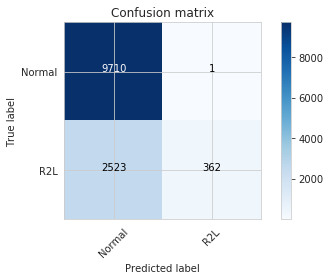

In [42]:
forest_R2L = RandomForestClassifier(random_state=1, max_depth=15, 
                                   n_estimators=500, min_samples_split=2, 
                                   min_samples_leaf=1)
                                   
modelR2L = forest_R2L.fit(R2L_X, R2L_Y)
y_pred_r2l = modelR2L.predict(test_R2L_X)
print(classification_report(test_R2L_Y, y_pred_r2l))
plot_confusion_matrix(confusion_matrix(test_R2L_Y, y_pred_r2l),['Normal', 'R2L'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67343
           3       0.99      0.92      0.96       995

   micro avg       1.00      1.00      1.00     68338
   macro avg       1.00      0.96      0.98     68338
weighted avg       1.00      1.00      1.00     68338

Confusion matrix, without normalization
[[67336     7]
 [   75   920]]


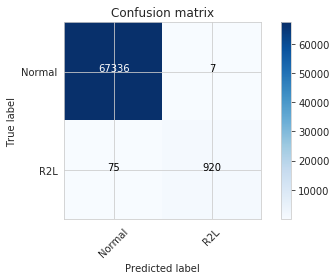

In [55]:
ay_pred_r2l = modelR2L.predict(R2L_X)
print(classification_report(R2L_Y, ay_pred_r2l))
plot_confusion_matrix(confusion_matrix(R2L_Y, ay_pred_r2l),['Normal', 'R2L'])


              precision    recall  f1-score   support

           0       0.79      1.00      0.88      9711
           3       0.99      0.11      0.20      2885

   micro avg       0.80      0.80      0.80     12596
   macro avg       0.89      0.56      0.54     12596
weighted avg       0.84      0.80      0.73     12596

Confusion matrix, without normalization
[[9709    2]
 [2563  322]]


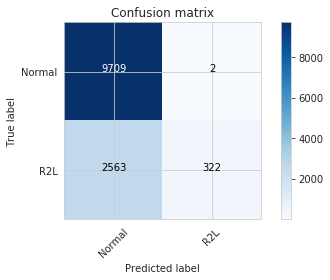

In [43]:
xgb_R2L = xgb.XGBClassifier(learning_rate=0.02, n_estimators=500, objective='binary:logistic',
                                silent=True, nthread=8, random_state=1)
                                   
modelR2L_2 = xgb_R2L.fit(R2L_X, R2L_Y)
y_pred_r2l = modelR2L_2.predict(test_R2L_X)
print(classification_report(test_R2L_Y, y_pred_r2l))
plot_confusion_matrix(confusion_matrix(test_R2L_Y, y_pred_r2l),['Normal', 'R2L'])

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      9711
           3       1.00      0.21      0.35      2885

   micro avg       0.82      0.82      0.82     12596
   macro avg       0.90      0.61      0.62     12596
weighted avg       0.85      0.82      0.77     12596

Confusion matrix, without normalization
[[9709    2]
 [2275  610]]


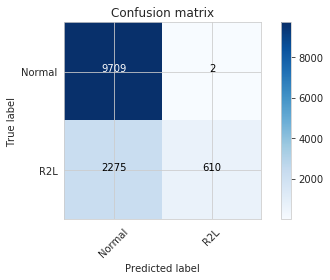

In [52]:
dtree_R2L = DecisionTreeClassifier(criterion = 'entropy', random_state=1)                              
modelR2L_3 = dtree_R2L.fit(R2L_X, R2L_Y)
y_pred_r2l = modelR2L_3.predict(test_R2L_X)
print(classification_report(test_R2L_Y, y_pred_r2l))
plot_confusion_matrix(confusion_matrix(test_R2L_Y, y_pred_r2l),['Normal', 'R2L'])

>### U2R model training - XGradient Boosting

In [31]:
U2R_X = X_train_dic['U2R']
U2R_Y = Y_train_dic['U2R']
test_U2R_X = X_test_dic['U2R']
test_U2R_Y = Y_test_dic['U2R']

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.83      0.07      0.14        67

   micro avg       0.99      0.99      0.99      9778
   macro avg       0.91      0.54      0.57      9778
weighted avg       0.99      0.99      0.99      9778

Confusion matrix, without normalization
[[9710    1]
 [  62    5]]


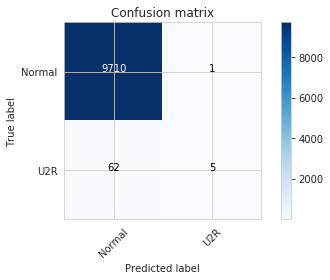

In [44]:
xgb_u2r = xgb.XGBClassifier(learning_rate=0.02, n_estimators=500, objective='binary:logistic',
                                silent=True, nthread=8, random_state=1)
modelU2R = xgb_u2r.fit(U2R_X, U2R_Y)
y_pred_u2r = modelU2R.predict(test_U2R_X)
print(classification_report(test_U2R_Y, y_pred_u2r))
plot_confusion_matrix(confusion_matrix(test_U2R_Y, y_pred_u2r),['Normal', 'U2R'])

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       1.00      0.09      0.16        67

   micro avg       0.99      0.99      0.99      9778
   macro avg       1.00      0.54      0.58      9778
weighted avg       0.99      0.99      0.99      9778

Confusion matrix, without normalization
[[9711    0]
 [  61    6]]


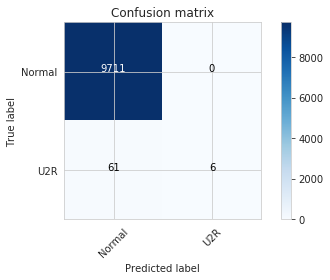

In [45]:
forest_u2r = RandomForestClassifier(random_state=1, max_depth=15, 
                                   n_estimators=500, min_samples_split=2, 
                                   min_samples_leaf=1)

modelU2R_2 = forest_u2r.fit(U2R_X, U2R_Y)
y_pred_u2r = modelU2R_2.predict(test_U2R_X)
print(classification_report(test_U2R_Y, y_pred_u2r))
plot_confusion_matrix(confusion_matrix(test_U2R_Y, y_pred_u2r),['Normal', 'U2R'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           4       0.89      0.36      0.51        67

   micro avg       1.00      1.00      1.00      9778
   macro avg       0.94      0.68      0.75      9778
weighted avg       0.99      1.00      0.99      9778

Confusion matrix, without normalization
[[9708    3]
 [  43   24]]


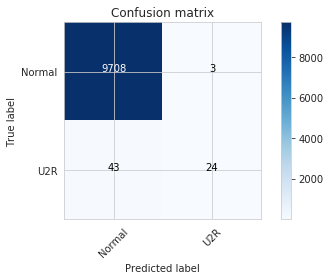

In [54]:
dtree_u2r = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
modelU2R_3 = dtree_u2r.fit(U2R_X, U2R_Y)
y_pred_u2r = modelU2R_3.predict(test_U2R_X)
print(classification_report(test_U2R_Y, y_pred_u2r))
plot_confusion_matrix(confusion_matrix(test_U2R_Y, y_pred_u2r),['Normal', 'U2R'])

>### Create ensemble